In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc file xlsx của DH22HM

In [29]:
HM = pd.read_excel("Data\\DH22HM.xlsx")
HM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mã SV        57 non-null     int64  
 1   Mã lớp       57 non-null     object 
 2   Vắng mặt LT  57 non-null     int64  
 3   CC_LT        57 non-null     int64  
 4   Số bài TH    57 non-null     int64  
 5   CC_TH        57 non-null     int64  
 6   CC           57 non-null     int64  
 7   GK           57 non-null     float64
 8   CK           57 non-null     object 
 9   TK10         57 non-null     object 
dtypes: float64(1), int64(6), object(3)
memory usage: 4.6+ KB


# Xử lý missing data

In [40]:
HM['CK'] = HM['CK'].replace('V', '0')
HM['CK'] = HM['CK'].astype(float)
HM['TK10'] = HM['CC'] * 0.2 + HM['GK'] * 0.2 + HM['CK'] * 0.6

HM['CK']

0     8.2
1     7.9
2     5.3
3     7.0
4     4.5
5     4.4
6     6.6
7     5.2
8     6.0
9     6.1
10    4.8
11    5.5
12    7.0
13    9.0
14    5.3
15    7.8
16    6.6
17    7.1
18    7.5
19    3.4
20    0.0
21    7.2
22    7.4
23    7.2
24    5.4
25    4.8
26    8.5
27    2.8
28    8.6
29    8.3
30    9.0
31    7.8
32    6.2
33    8.3
34    7.4
35    8.2
36    9.0
37    9.0
38    7.9
39    8.3
40    9.0
41    9.6
42    9.1
43    8.0
44    8.6
45    9.8
46    7.9
47    8.6
48    6.2
49    9.6
50    7.6
51    6.7
52    5.1
53    9.3
54    0.0
55    8.2
56    5.8
Name: CK, dtype: float64

In [62]:
TK = sorted(HM['TK10'].unique().round(2))
TK

[1.16,
 1.52,
 3.5,
 5.12,
 5.34,
 5.54,
 5.82,
 6.1,
 6.18,
 6.2,
 6.44,
 6.6,
 6.64,
 6.68,
 6.72,
 6.84,
 6.98,
 7.06,
 7.1,
 7.1,
 7.14,
 7.16,
 7.18,
 7.42,
 7.44,
 7.76,
 7.78,
 7.8,
 7.84,
 7.9,
 7.98,
 8.0,
 8.1,
 8.14,
 8.16,
 8.2,
 8.24,
 8.36,
 8.42,
 8.5,
 8.56,
 8.6,
 8.62,
 8.72,
 8.8,
 8.86,
 8.88,
 8.94,
 8.96,
 9.0,
 9.16,
 9.24]

# Thống kê về số lượng buổi nghỉ

In [31]:
absent = HM['Vắng mặt LT'].value_counts()

table = {i: 0 for i in range(6)}
for key, value in absent.items():
    table[int(key)] = value

table


{0: 47, 1: 8, 2: 2, 3: 0, 4: 0, 5: 0}

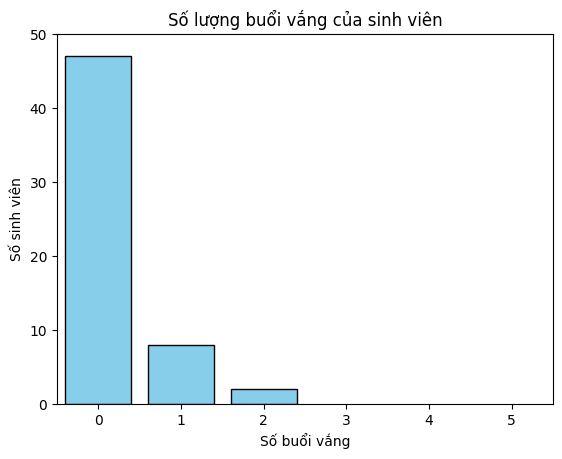

In [32]:
import matplotlib.pyplot as plt

# Dữ liệu từ từ điển practice_sorted
x = list(table.keys())
y = list(table.values())

# Vẽ biểu đồ cột
bars = plt.bar(x, y, color='skyblue', edgecolor='black')

# Đặt chiều rộng của cột
bar_width = 0.8
for bar in bars:
    if bar.get_height() == 0:
        bar.set_edgecolor('white')  # Để các cột có giá trị 0 không nổi bật

# Thiết lập khoảng cách giữa các cột
plt.gca().set_xlim(-0.5, len(x) - 0.5)

# Thiết lập giới hạn trục
plt.ylim(0, 50)

# Thêm nhãn cho trục
plt.xlabel("Số buổi vắng")
plt.ylabel("Số sinh viên")
plt.title("Số lượng buổi vắng của sinh viên")

# Hiển thị biểu đồ
plt.show()


# Thống kê số lượng bài thực hành

In [33]:
practice = HM['Số bài TH'].value_counts()

table_practice = {i: 0 for i in range(6)}
for key, value in practice.items():
    table_practice[int(key)] = value

table_practice


{0: 5, 1: 0, 2: 0, 3: 1, 4: 2, 5: 49}

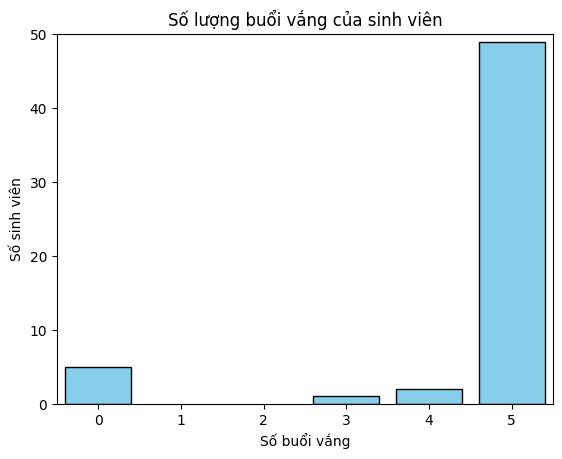

In [34]:
import matplotlib.pyplot as plt

# Dữ liệu từ từ điển practice_sorted
x = list(table_practice.keys())
y = list(table_practice.values())

# Vẽ biểu đồ cột
bars = plt.bar(x, y, color='skyblue', edgecolor='black')

# Đặt chiều rộng của cột
bar_width = 0.8
for bar in bars:
    if bar.get_height() == 0:
        bar.set_edgecolor('white')  # Để các cột có giá trị 0 không nổi bật

# Thiết lập khoảng cách giữa các cột
plt.gca().set_xlim(-0.5, len(x) - 0.5)

# Thiết lập giới hạn trục
plt.ylim(0, 50)

# Thêm nhãn cho trục
plt.xlabel("Số buổi vắng")
plt.ylabel("Số sinh viên")
plt.title("Số lượng buổi vắng của sinh viên")

# Hiển thị biểu đồ
plt.show()


# Phân tích bảng điểm của cả lớp HM

In [44]:
HM[['CC', 'GK', 'CK', 'TK10']].describe()

,CC,GK,CK,TK10
count,57.000000,57.00000,57.000000,57.000000
mean,9.280702,6.52807,6.940351,7.325965
std,1.708742,1.91337,2.111098,1.666339
min,3.000000,0.00000,0.000000,1.160000
25%,10.000000,6.10000,5.800000,6.680000
50%,10.000000,7.00000,7.400000,7.780000
75%,10.000000,7.50000,8.300000,8.560000
max,10.000000,9.00000,9.800000,9.240000


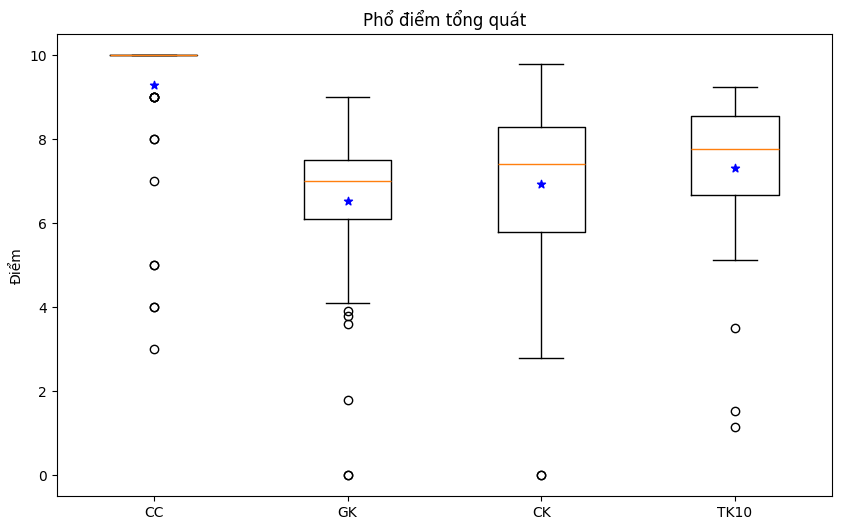

In [71]:
# Tạo kích thước.
plt.figure(figsize=(10, 6))


# Tạo boxplot cho các cột 'CC', 'GK', 'CK', 'TK10'
plt.boxplot(HM[['CC', 'GK', 'CK', 'TK10']],
           tick_labels = ['CC', 'GK', 'CK', 'TK10'],
)


# Tính giá trị mean cho từng cột
means = [HM['CC'].mean(), HM['GK'].mean(), HM['CK'].mean(), HM['TK10'].mean()]

plt.scatter(range(1, len(means) + 1), means, color='blue', marker='*', zorder=5)


plt.ylabel("Điểm")
plt.title("Phổ điểm tổng quát")


plt.show()

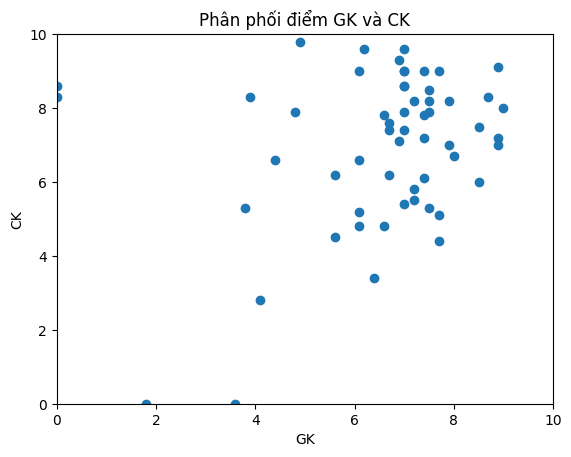

In [80]:
plt.scatter(HM['GK'], HM['CK'])
plt.axis((0, 10, 0, 10))
plt.xlabel("GK")
plt.ylabel("CK")
plt.title("Phân phối điểm GK và CK")
plt.show()

In [83]:
correlation = HM[['GK', 'CK']].corr().iloc[0, 1]
print(f"Hệ số tương quan giữa GK và CK: {correlation}")

Hệ số tương quan giữa GK và CK: 0.2676173917935099


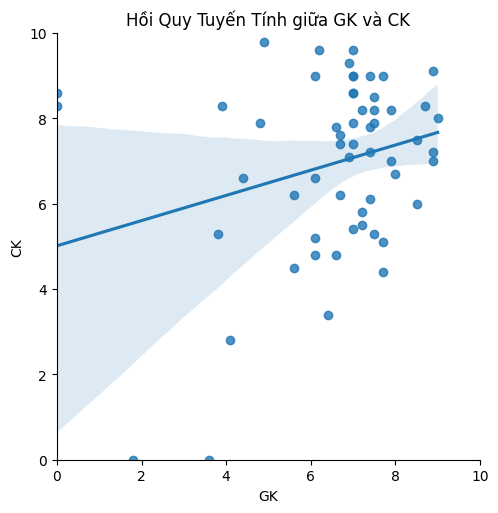

In [85]:
import seaborn as sns

# Tạo mô hình hồi quy tuyến tính
# lmplot cũng vẽ đồ thị hồi quy tuyến tính, nhưng có thêm vùng tin cậy
sns.lmplot(x='GK', y='CK', data=HM)
plt.axis((0, 10, 0, 10))
plt.xlabel("GK")
plt.ylabel("CK")
plt.title("Hồi Quy Tuyến Tính giữa GK và CK")
plt.show()

In [86]:
HM['Improvement'] = HM['CK'] - HM['GK']
print(HM['Improvement'].describe())

count    57.000000
mean      0.412281
std       2.440438
min      -3.600000
25%      -1.300000
50%       0.400000
75%       1.600000
max       8.600000
Name: Improvement, dtype: float64
